In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

plt.rc('font', family = "Malgun Gothic", size = 13)
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_excel('기상 데이터_홍로_일단위.xlsx', sheet_name = '전체')
df.columns

Index(['지역', '연도', '과중(g)', '종경(mm)', '횡경(mm)', 'L/D 비율', '경도1(N/ø11mm)',
       '경도2(N/ø11mm)', '경도평균', '당도(˚Brix)', '산도(%)', '착색(Hunter L)',
       '착색(Hunter a)', '착색(Hunter b)', 'Latitude', 'Longitude', '광역자치단체'],
      dtype='object')

In [3]:
df2 = df[['지역', '연도', 'L/D 비율', '당도(˚Brix)', '산도(%)', '착색(Hunter a)', '광역자치단체']]
df2.columns = ['지역', '연도', 'LD 비율', '당도', '산도', '착색(Hunter a)', '광역자치단체']
df2

,지역,연도,LD 비율,당도,산도,착색(Hunter a),광역자치단체
0,김제,2015,1.040000,14.60,0.190000,24.1000,전라북도
1,김제,2016,0.950000,15.30,0.190000,21.0000,전라북도
2,군위,2016,0.911701,16.12,0.227353,9.1670,경상북도
3,군위,2016,0.916667,16.08,0.194300,13.3550,경상북도
4,군위,2016,0.958162,17.10,0.184473,10.4040,경상북도
...,...,...,...,...,...,...,...
105,화성,2022,0.981791,12.55,0.260046,8.6235,경기도
106,완주,2022,0.944600,13.39,0.262278,10.8375,전라북도
107,완주,2022,0.938330,13.23,0.246774,14.5505,전라북도
108,완주,2022,0.928727,13.50,0.264610,4.6535,전라북도


In [ ]:
data = df2.loc[:, 'LD 비율':'착색(Hunter a)']
data

,LD 비율,당도,산도,착색(Hunter a)
0,1.040000,14.60,0.190000,24.1000
1,0.950000,15.30,0.190000,21.0000
2,0.911701,16.12,0.227353,9.1670
3,0.916667,16.08,0.194300,13.3550
4,0.958162,17.10,0.184473,10.4040
...,...,...,...,...
105,0.981791,12.55,0.260046,8.6235
106,0.944600,13.39,0.262278,10.8375
107,0.938330,13.23,0.246774,14.5505
108,0.928727,13.50,0.264610,4.6535


In [ ]:
data2 = data
data2

,LD 비율,당도,산도,착색(Hunter a)
0,1.040000,14.60,0.190000,24.1000
1,0.950000,15.30,0.190000,21.0000
2,0.911701,16.12,0.227353,9.1670
3,0.916667,16.08,0.194300,13.3550
4,0.958162,17.10,0.184473,10.4040
...,...,...,...,...
105,0.981791,12.55,0.260046,8.6235
106,0.944600,13.39,0.262278,10.8375
107,0.938330,13.23,0.246774,14.5505
108,0.928727,13.50,0.264610,4.6535


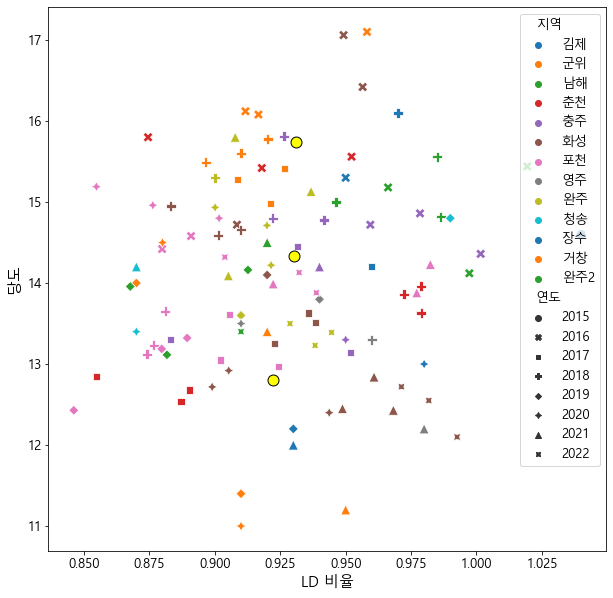

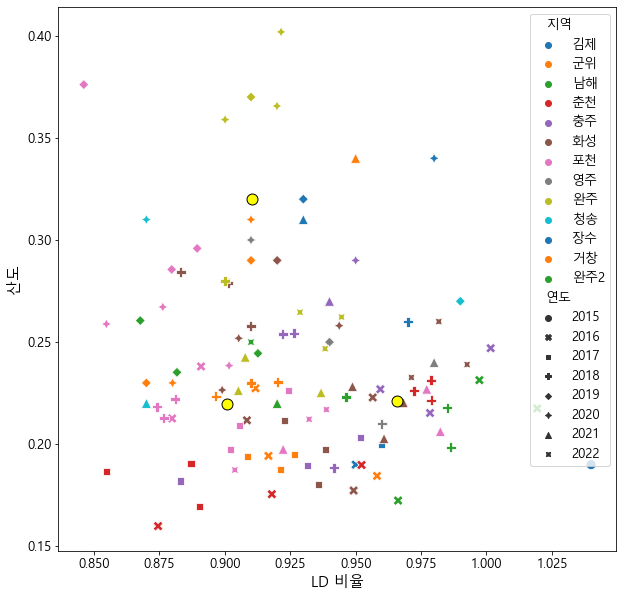

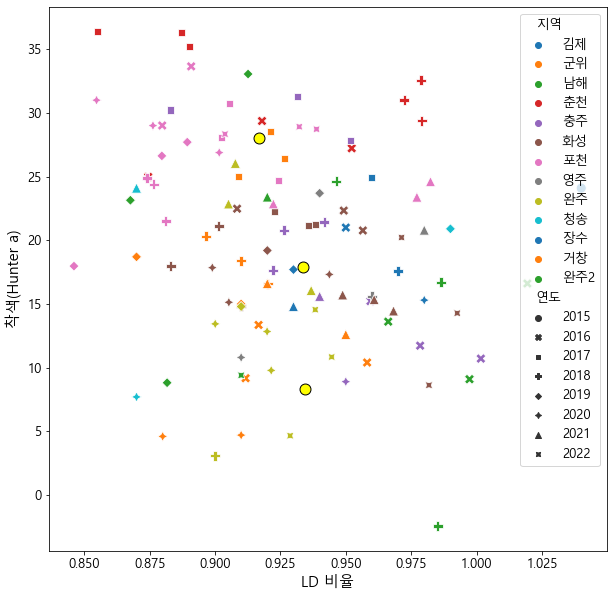

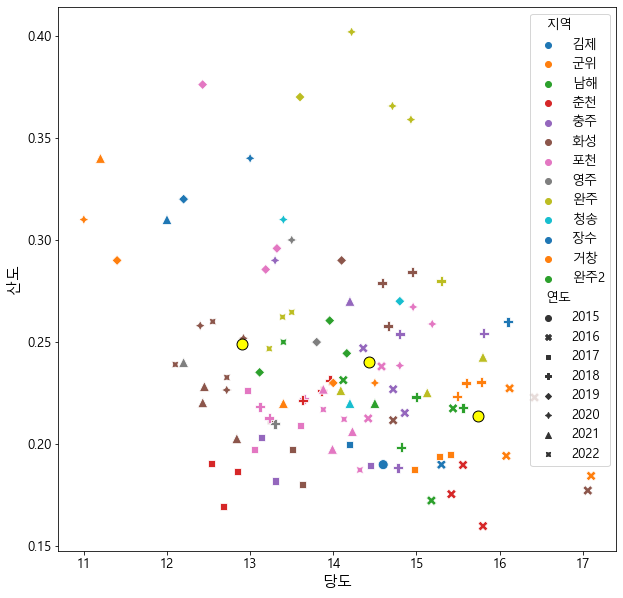

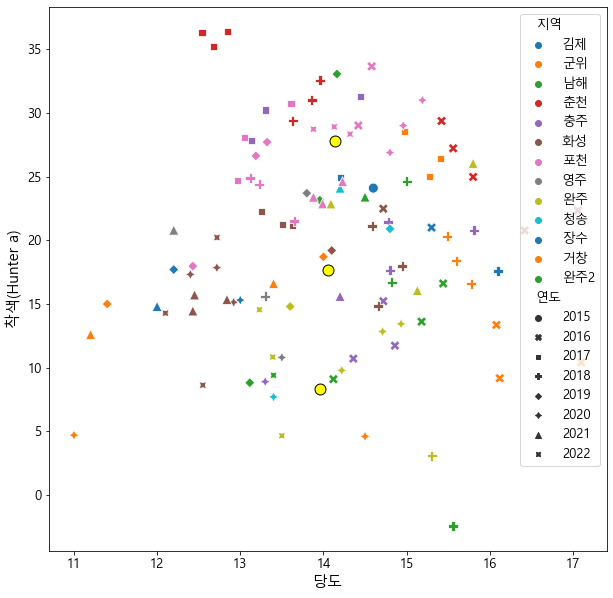

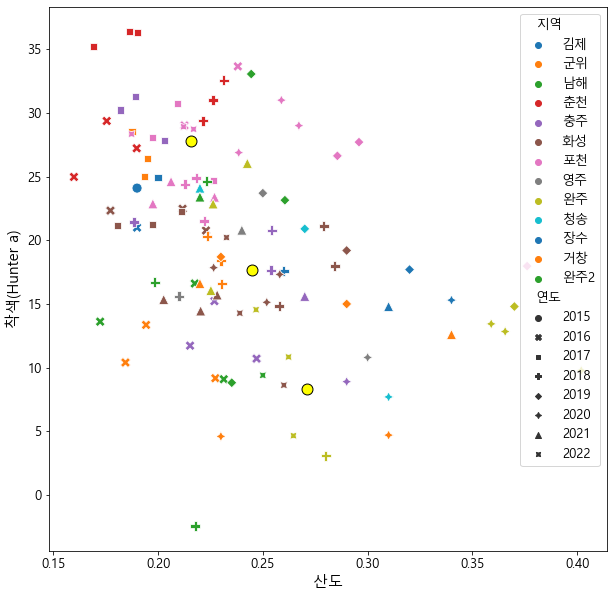

In [ ]:
data2 = data

for col in data.columns:
    Kmean = KMeans(n_clusters = 3)
    
    data2 = data2.drop(columns = [col])
    
    for col2 in data2.columns:
        pred = Kmean.fit_predict(data[[f'{col}', f'{col2}']])
        
        center = Kmean.cluster_centers_

        plt.figure(figsize = (10, 10))
        sns.scatterplot(data = df2, x = f'{col}', y = f'{col2}', 
                    c = pred, hue = '지역', style = '연도', s = 100, palette = "tab10")
        plt.scatter(x = center[:, 0], y = center[:,1], c = 'yellow', edgecolor = 'black', s = 120,)

        plt.xlabel(f'{col}', fontsize = 15)
        plt.ylabel(f'{col2}', fontsize = 15)

        plt.savefig(f'{col}_{col2}')
        
plt.show()

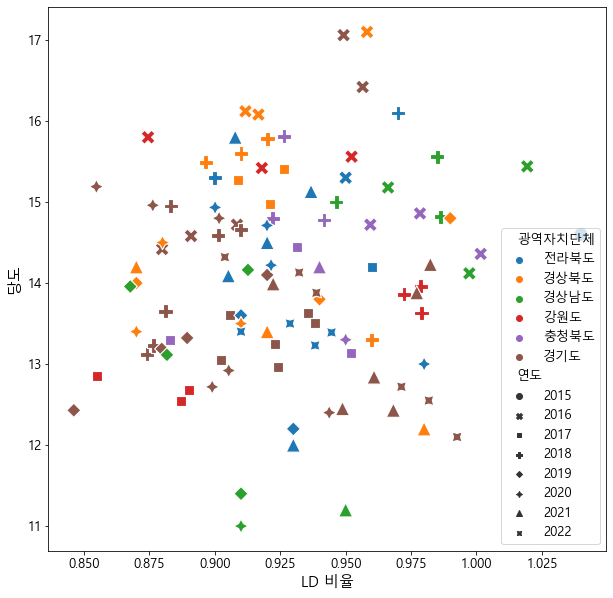

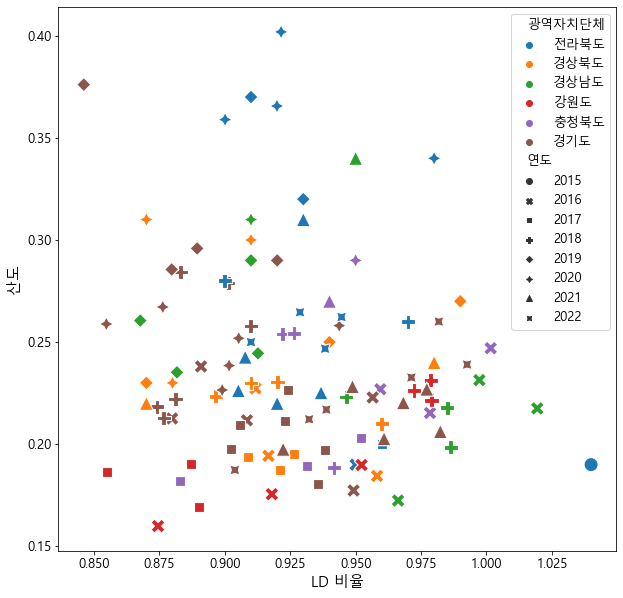

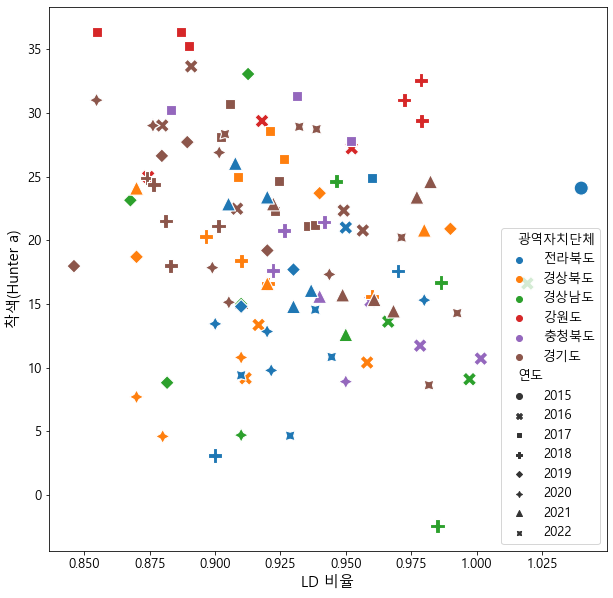

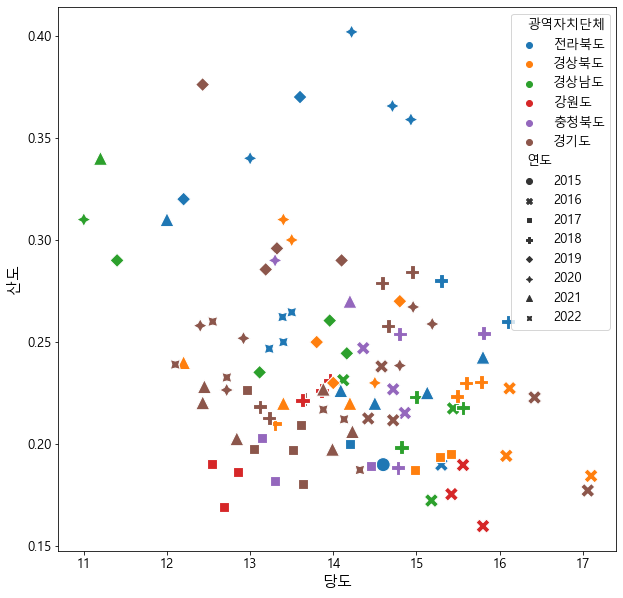

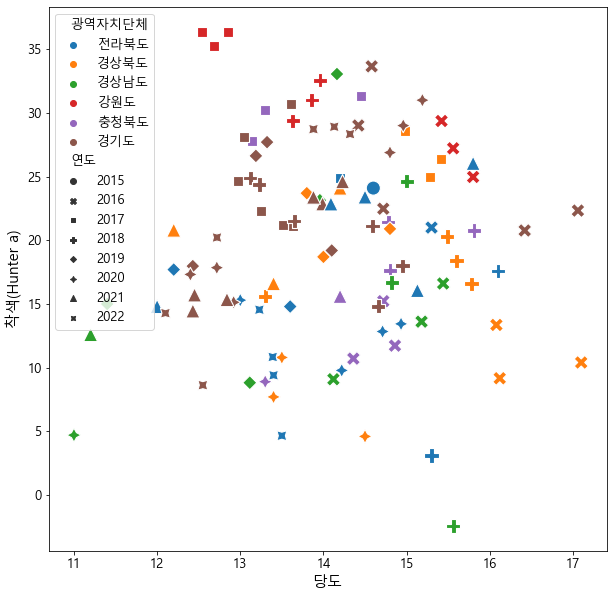

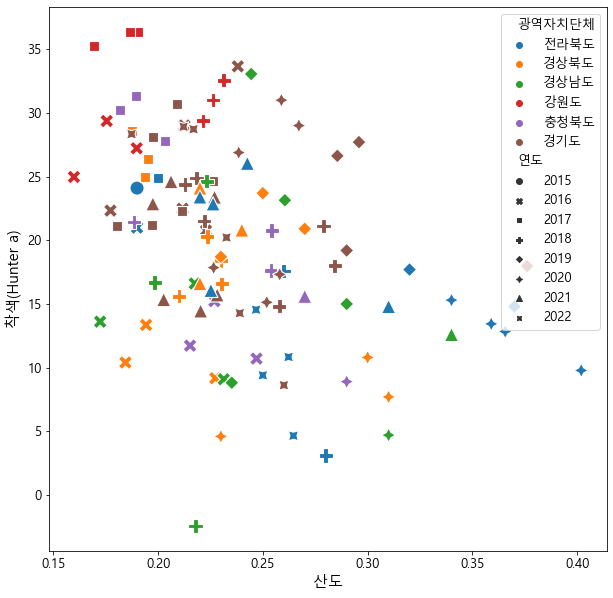

In [ ]:
data2 = data

for col in data.columns:
    Kmean = KMeans(n_clusters = 3)
    
    data2 = data2.drop(columns = [col])
    
    for col2 in data2.columns:
        pred = Kmean.fit_predict(data[[f'{col}', f'{col2}']])
        
        center = Kmean.cluster_centers_

        plt.figure(figsize = (10, 10))
        sns.scatterplot(data = df2, x = f'{col}', y = f'{col2}', 
                    c = pred, hue = '광역자치단체', style = '연도', s = 200, palette = "tab10")
#         plt.scatter(x = center[:, 0], y = center[:,1], c = 'yellow', edgecolor = 'black', s = 200,)

        plt.xlabel(f'{col}', fontsize = 15)
        plt.ylabel(f'{col2}', fontsize = 15)

        plt.savefig(f'{col}_{col2}')
        
plt.show()

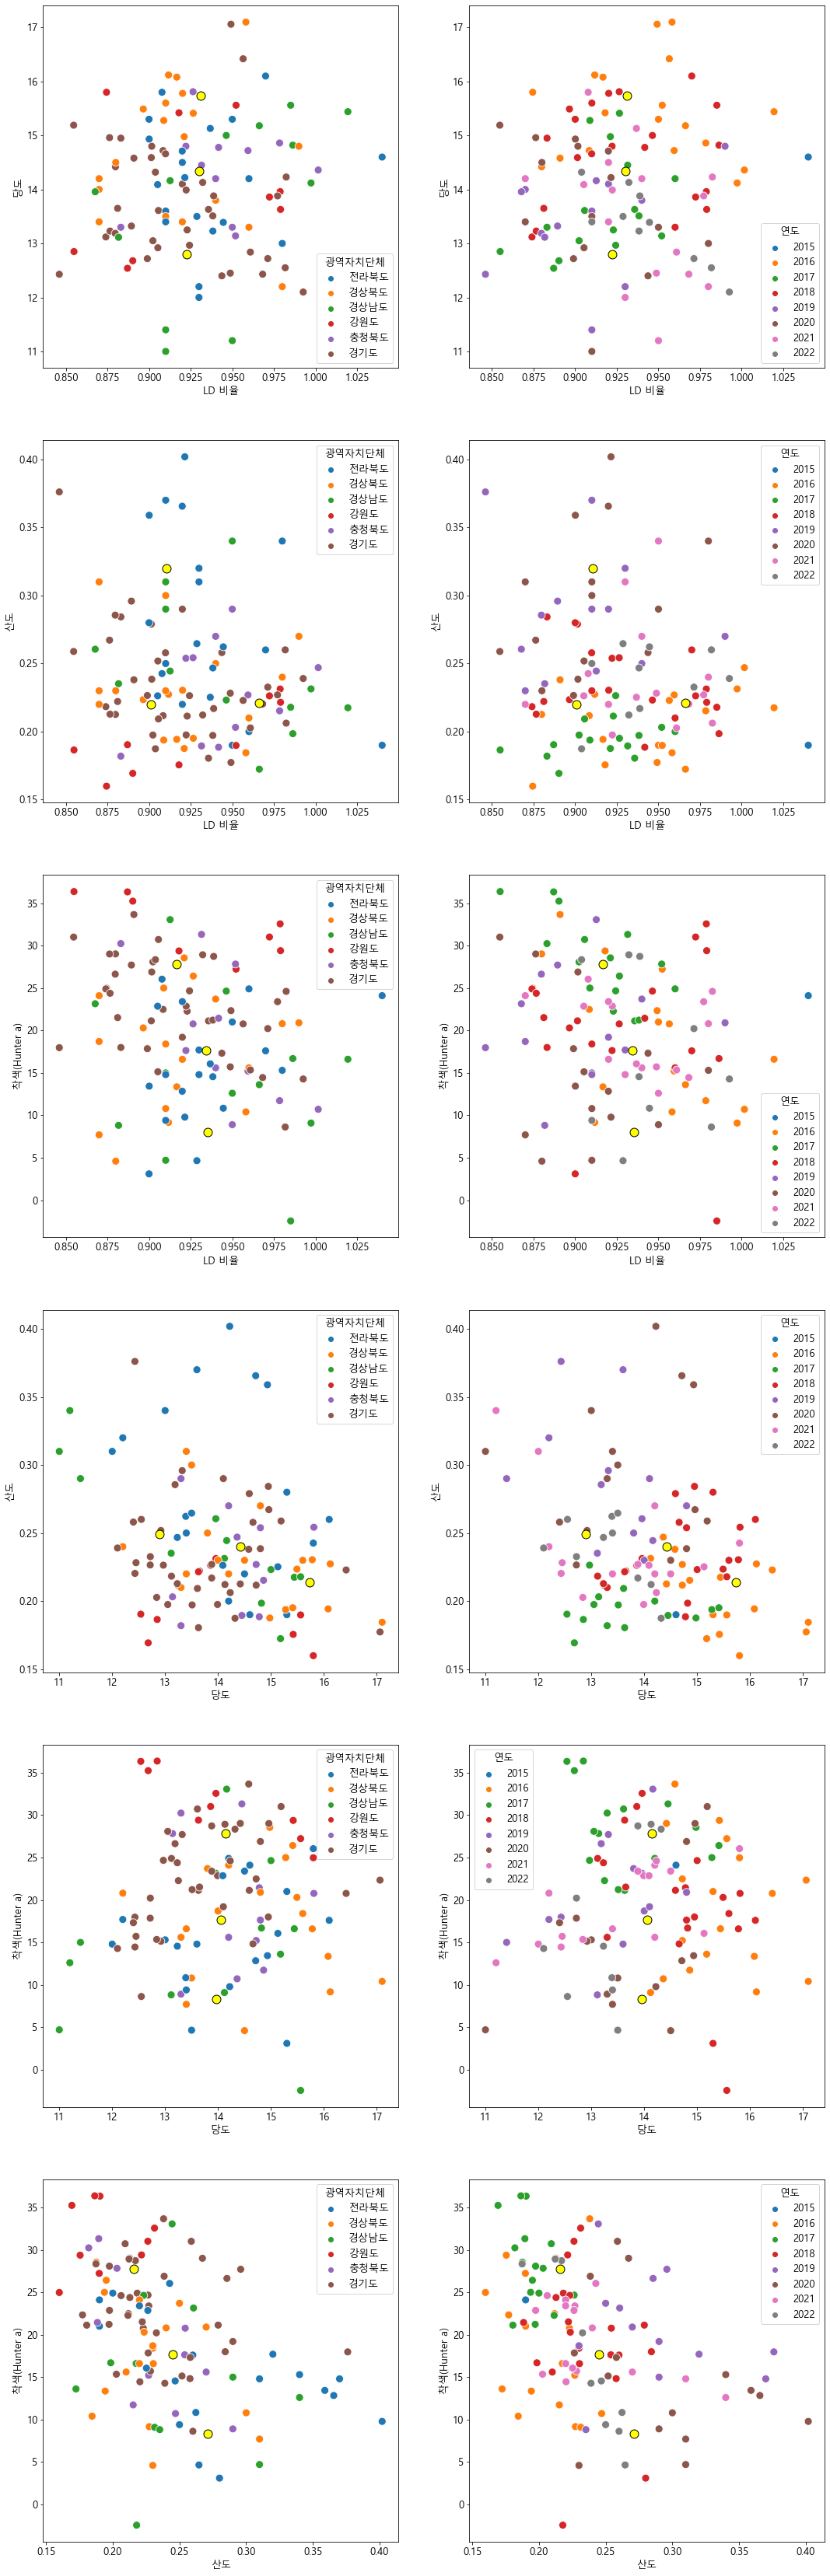

In [ ]:
data2 = data
idx = 1

plt.figure(figsize = (18, 60))

for col in data.columns:
    Kmean = KMeans(n_clusters = 3)
    
    data2 = data2.drop(columns = [col])
    
    for col2 in data2.columns:
        pred = Kmean.fit_predict(data[[f'{col}', f'{col2}']])
        
        center = Kmean.cluster_centers_

        plt.subplot(6, 2, idx)
        sns.scatterplot(data = df2, x = f'{col}', y = f'{col2}', 
                    c = pred, hue = '광역자치단체', s = 100, palette = "tab10")
        plt.scatter(x = center[:, 0], y = center[:,1], c = 'yellow', edgecolor = 'black', s = 120,)
        
        plt.subplot(6, 2, idx + 1)
        sns.scatterplot(data = df2, x = f'{col}', y = f'{col2}', 
                    c = pred, hue = '연도', s = 100, palette = "tab10")
        plt.scatter(x = center[:, 0], y = center[:,1], c = 'yellow', edgecolor = 'black', s = 120,)

        plt.xlabel(f'{col}')
        plt.ylabel(f'{col2}')

#         plt.savefig(f'{col}_{col2}')
        
        idx += 2
        
plt.show()

In [ ]:
df2[df['지역'] == "남해"]

,지역,연도,LD 비율,당도,산도,착색(Hunter a),광역자치단체
5,남해,2016,0.966226,15.180000,0.172413,13.612000,경상남도
6,남해,2016,0.997289,14.120000,0.231373,9.090000,경상남도
7,남해,2016,1.019423,15.440000,0.217527,16.608000,경상남도
49,남해,2018,0.985071,15.560000,0.217884,-2.443000,경상남도
50,남해,2018,0.986352,14.820000,0.198467,16.690500,경상남도
51,남해,2018,0.946374,15.000000,0.223177,24.638000,경상남도
65,남해,2019,0.912655,14.162500,0.244483,33.058125,경상남도
66,남해,2019,0.881694,13.114286,0.235189,8.817143,경상남도
67,남해,2019,0.867660,13.957143,0.260534,23.147143,경상남도


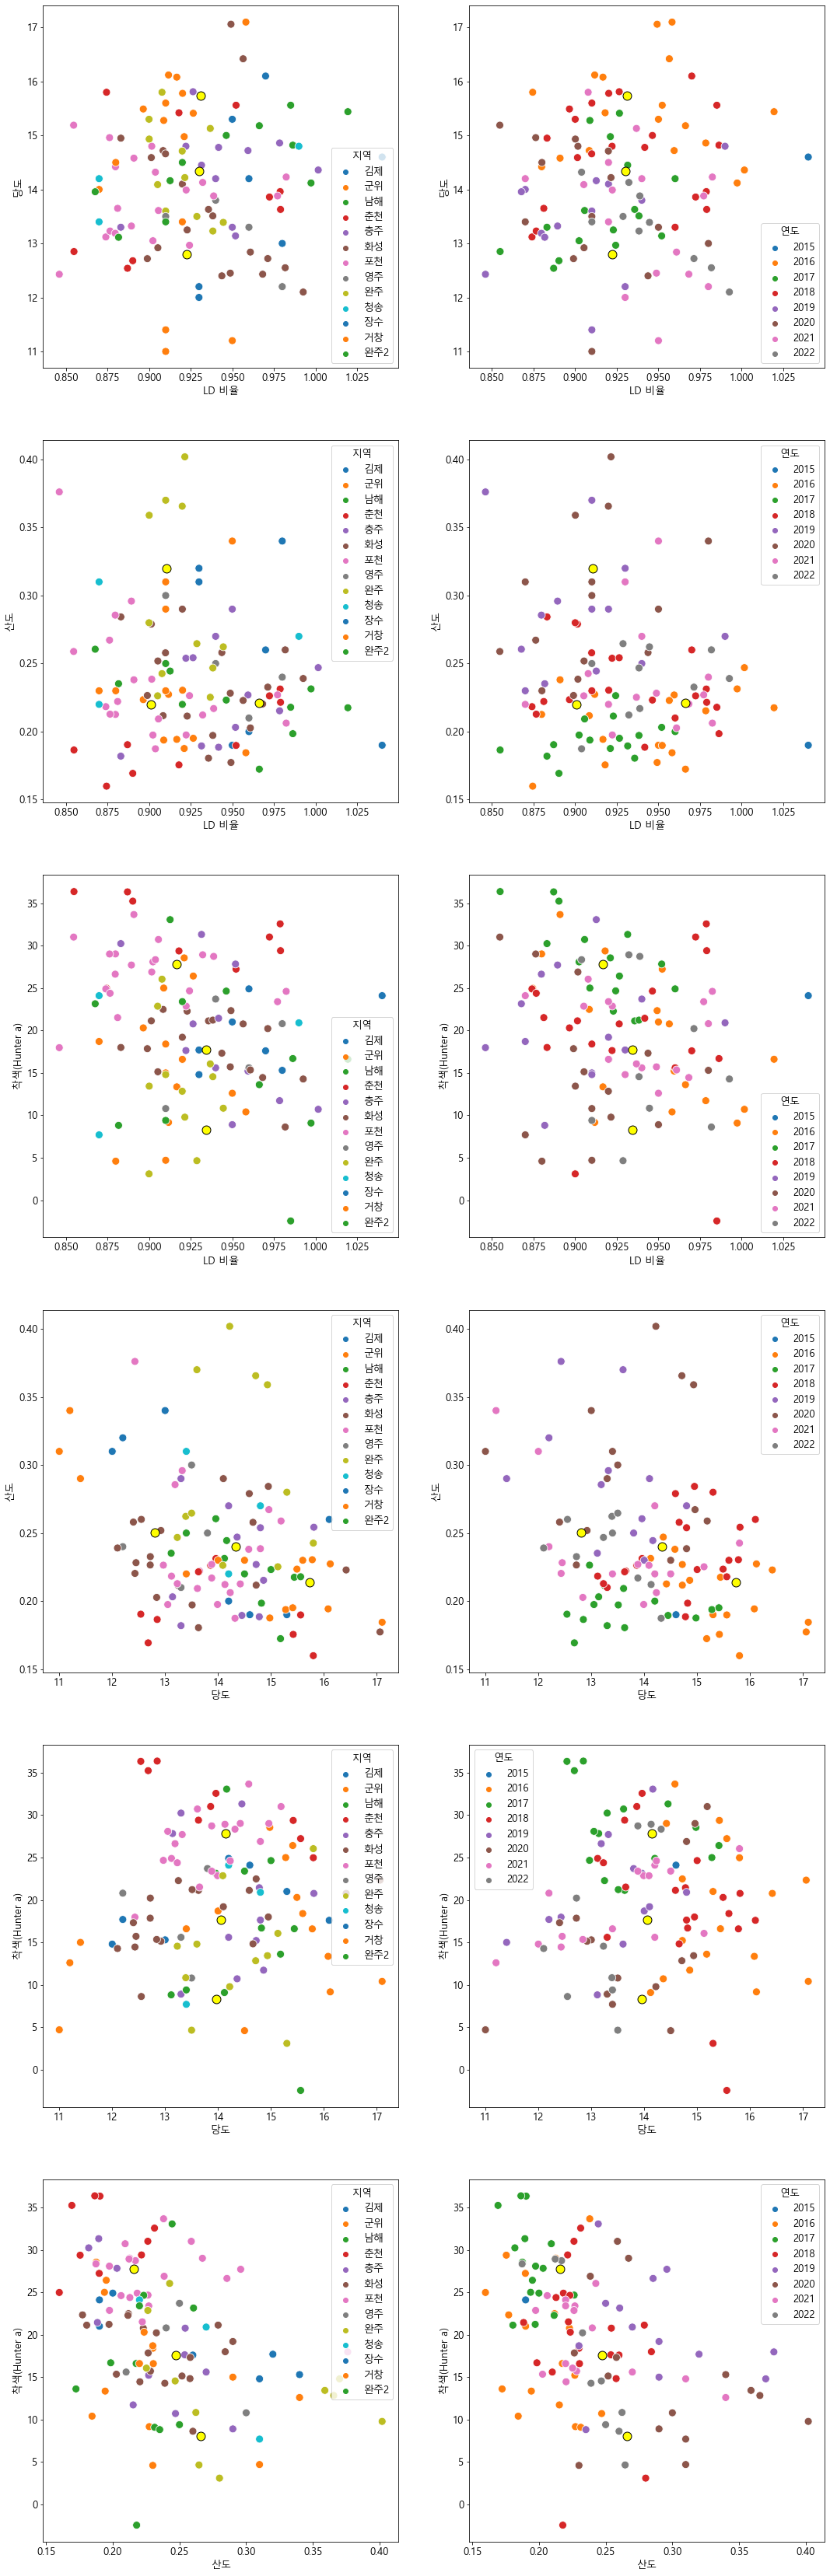

In [ ]:
data2 = data
idx = 1

plt.figure(figsize = (18, 60))

for col in data.columns:
    Kmean = KMeans(n_clusters = 3)
    
    data2 = data2.drop(columns = [col])
    
    for col2 in data2.columns:
        pred = Kmean.fit_predict(data[[f'{col}', f'{col2}']])
        
        center = Kmean.cluster_centers_

        plt.subplot(6, 2, idx)
        sns.scatterplot(data = df2, x = f'{col}', y = f'{col2}', 
                    c = pred, hue = '지역', s = 100, palette = "tab10")
#         plt.scatter(x = center[:, 0], y = center[:,1], c = 'yellow', edgecolor = 'black', s = 120,)
        
        plt.subplot(6, 2, idx + 1)
        sns.scatterplot(data = df2, x = f'{col}', y = f'{col2}', 
                    c = pred, hue = '연도', s = 100, palette = "tab10")
#         plt.scatter(x = center[:, 0], y = center[:,1], c = 'yellow', edgecolor = 'black', s = 120,)

        plt.xlabel(f'{col}')
        plt.ylabel(f'{col2}')

#         plt.savefig(f'{col}_{col2}')
        
        idx += 2
        
plt.show()

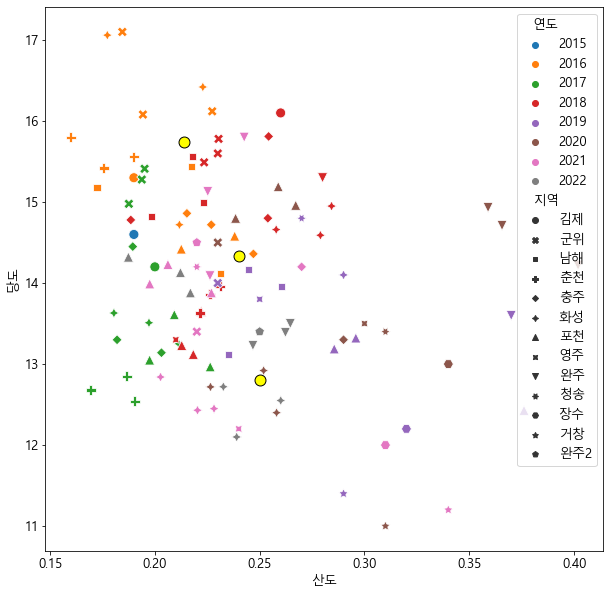

In [ ]:
plt.rc('font', family = "Malgun Gothic", size = 13)
plt.rcParams['axes.unicode_minus'] = False

Kmean = KMeans(n_clusters = 3)
pred = Kmean.fit_predict(df2[['산도', '당도']])

center = Kmean.cluster_centers_

plt.figure(figsize = (10, 10))
sns.scatterplot(data = df2, x = '산도', y = '당도', c = pred, 
                hue = '연도', style = '지역', palette = 'tab10', s = 100)
plt.scatter(x = center[:, 0], y = center[:,1], c = 'yellow', edgecolor = 'black', s = 120,)

plt.xlabel('산도')
plt.ylabel('당도')

plt.savefig('산도_당도')
plt.show()